# Week 1: 
I am going to buy 10 shares from 3 different stocks of different industries. I chose the companies Tesla, Microsoft, and Costco. I chose these because I knew what they were about and seem to be doing well based off of research of different stocks.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

symbols = ['TSLA', 'COST', 'MSFT']
start = '2015-01-01'
end = '2021-11-18'
df = pd.DataFrame()
data = []
for symbol in symbols:
    df = pd.merge(df, pd.DataFrame(yf.download(symbol, fields='price', 
                           start=start, end=end)['Adj Close']), 
                           right_index=True, left_index=True, how='outer')
       
    data.append(symbol)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [38]:
df.columns = data
df = df.dropna(axis='columns')
df.head()

,TSLA,COST,MSFT
Date,,,
2015-01-02,43.862000,119.715324,41.193836
2015-01-05,42.018002,118.354309,40.815029
2015-01-06,42.256001,119.918228,40.215965
2015-01-07,42.189999,122.006401,40.726929
2015-01-08,42.124001,123.054619,41.925034


In [39]:
df.tail()

,TSLA,COST,MSFT
Date,,,
2021-11-11,1063.510010,512.179993,331.822906
2021-11-12,1033.420044,517.169983,336.105103
2021-11-15,1013.390015,519.890015,335.456299
2021-11-16,1054.729980,526.719971,338.890015
2021-11-17,1089.010010,526.289978,339.119995


In [40]:
df.describe()

,TSLA,COST,MSFT
count,1733.000000,1733.000000,1733.000000
mean,176.683940,224.103003,117.789988
std,246.228532,96.840973,76.320492
min,28.733999,116.824768,35.590919
25%,46.462002,141.932190,53.251270
50%,61.222000,188.665054,95.003159
75%,126.846001,290.482086,162.621094
max,1229.910034,526.719971,339.119995


## Stock Return

([<matplotlib.axis.YTick at 0x120504f10>,
 [Text(0, 0, 'TSLA'), Text(0, 1, 'COST'), Text(0, 2, 'MSFT')])

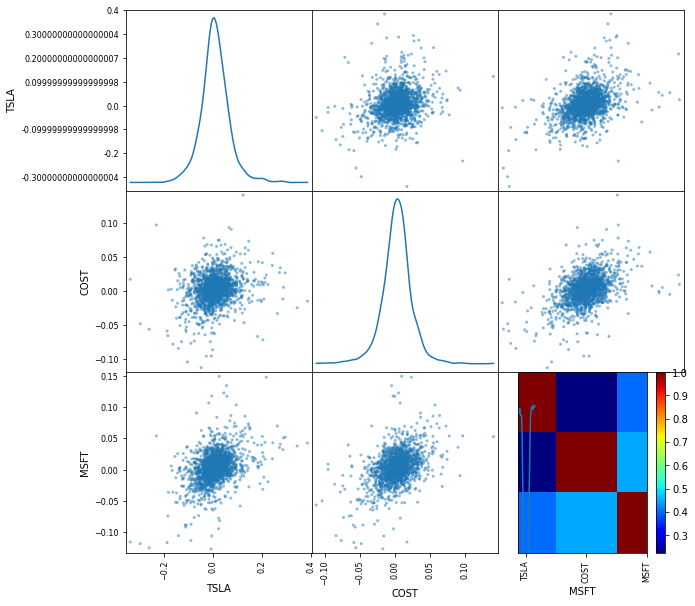

In [41]:
from pandas.plotting import scatter_matrix

rets = df.pct_change(periods=3)
scatter_matrix(rets, diagonal='kde', figsize=(10, 10))
corr = rets.corr()
plt.imshow(corr, cmap='jet', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

Text(0, 0.5, 'Standard Deviations')

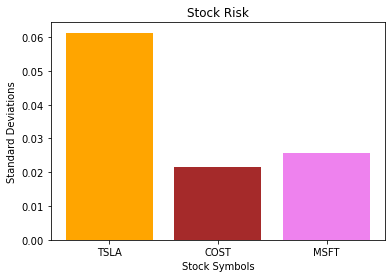

In [42]:
plt.bar(rets.columns, rets.std(), color=['orange', 'brown', 'violet'])
plt.title("Stock Risk")
plt.xlabel("Stock Symbols")
plt.ylabel("Standard Deviations")

Text(0, 0.5, 'Returns')

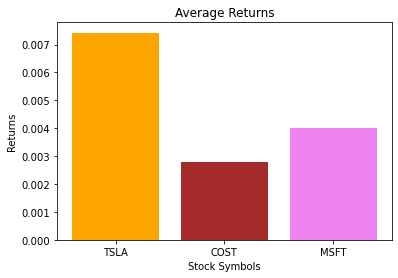

In [43]:
plt.bar(rets.columns, rets.mean(), color=['orange', 'brown', 'violet'])
plt.title("Average Returns")
plt.xlabel("Stock Symbols")
plt.ylabel("Returns")

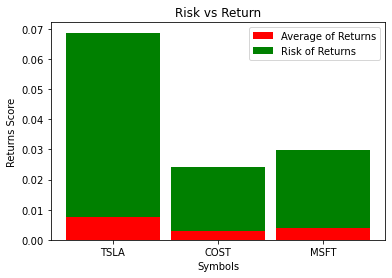

In [44]:
symbols = ['TSLA', 'COST', 'MSFT']
ind = [x for x, _ in enumerate(symbols)]

plt.bar(ind, rets.mean(), width=0.9, label='Average of Returns', color='r')
plt.bar(ind, rets.std(), width=0.9, label='Risk of Returns', color='g', bottom=rets.mean())

plt.xticks(ind, symbols)
plt.ylabel("Returns Score")
plt.xlabel("Symbols")
plt.legend(loc="upper right")
plt.title('Risk vs Return')
plt.show()

## Risk vs Expected Return

In [45]:
d = {'Risk':rets.std(), 'Expected Returns':rets.mean()}
tables = pd.DataFrame(data=d)
tables   

,Risk,Expected Returns
TSLA,0.061305,0.007423
COST,0.021477,0.002801
MSFT,0.025676,0.004004


## Trade Executions: 

Starting funds as of 11/19: $250,000

In [54]:
#Week 1 Funds
week1start = 250000.00
week2end = 250342.05


#Week 1 starting funds
print("Starting funds as of 11/19: ${}".format(week1start))

#Week 1 ending funds
print("Ending funds as of 11/19: ${}".format(week2end))

# Percent gain/loss
percentDiffrence = ((week1start - week2end)/((week1start + week2end)/2))*-100
print("Percent gain/loss was: +{}%".format(percentDiffrence))

#Profit
gain_loss = week2end - week1start
print("Profit as of 11/19: ${}".format(gain_loss))

Starting funds as of 11/19: $250000.0
Ending funds as of 11/19: $250342.05
Percent gain/loss was: +0.1367264654249981%
Profit as of 11/19: $342.04999999998836
